In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
iris =  datasets.load_iris() 
x = iris.data 
y = iris.target
print(x[:5])
print(y[:20])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
#print(x[:,0])
#print(x[:,1])
#print(x[:,2])
print(x[:,3])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [4]:
#plt.scatter(x[:,0],x[:,1],marker='*', c=y)
#plt.show()

In [5]:
#plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
#plt.show()

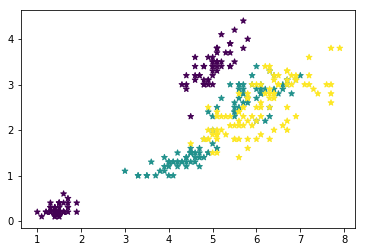

In [6]:
plt.scatter(x[:,0],x[:,1],marker='*', c=y)
plt.scatter(x[:,2],x[:,3],marker='*', c=y) 
plt.show()

In [7]:
def get_random_centroids(k):
    centroids={}
    while True:
        ri=np.random.choice(range(len(x)), k)
        print(ri)
        if len(set(ri))==k:  #found distinct k indexes.
            for i in range(k):
                centroids[i]=x[ri[i]]
            break

    return centroids

In [8]:
k = 3
centroids=get_random_centroids(k)
#print(centroids.keys())
print(centroids)

[ 11  61 121]
{0: array([4.8, 3.4, 1.6, 0.2]), 1: array([5.9, 3. , 4.2, 1.5]), 2: array([5.6, 2.8, 4.9, 2. ])}


In [9]:
def e_dist(x1, x2):
    return np.sqrt( (x1[0]-x2[0])**2 +  (x1[1]-x2[1])**2)

def e_dist(x1, x2):
    return np.linalg.norm(x1-x2)

In [10]:
e_dist(np.array([0,0]), np.array([3,4]))

5.0

In [11]:
print(centroids.items())

dict_items([(0, array([4.8, 3.4, 1.6, 0.2])), (1, array([5.9, 3. , 4.2, 1.5])), (2, array([5.6, 2.8, 4.9, 2. ]))])


In [12]:
xx=[8,9,5,3]
dd=[e_dist(xx,v) for k,v in centroids.items() ]
print(dd)

closest=dd.index( min(dd) )
print(closest)

[7.810249675906654, 6.58027355054484, 6.723838189605696]
1


In [13]:
for xx in x:                                        #for each sample
    dists=[e_dist(xx,v) for k,v in centroids.items() ]
    closest=dists.index( min(dists) )
    mc=list(centroids.values())[closest]
    print('xx =',xx,' closest centroid =',mc)
    

xx = [5.1 3.5 1.4 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.9 3.  1.4 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.7 3.2 1.3 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.6 3.1 1.5 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.  3.6 1.4 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.4 3.9 1.7 0.4]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.6 3.4 1.4 0.3]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.  3.4 1.5 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.4 2.9 1.4 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.9 3.1 1.5 0.1]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.4 3.7 1.5 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.8 3.4 1.6 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.8 3.  1.4 0.1]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [4.3 3.  1.1 0.1]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.8 4.  1.2 0.2]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.7 4.4 1.5 0.4]  closest centroid = [4.8 3.4 1.6 0.2]
xx = [5.4 3.9 1.3 0.4]  

In [14]:
print(centroids)

{0: array([4.8, 3.4, 1.6, 0.2]), 1: array([5.9, 3. , 4.2, 1.5]), 2: array([5.6, 2.8, 4.9, 2. ])}


# Finding Good K using elbow method

In [15]:
nitr=200
sses={}
for k in range(1,13):                                                       #trying for different k value.
    
    centroids=get_random_centroids(k)
    old_centroids={}
    
    for i in range(nitr):
        clusters={}
        for ik,iv in centroids.items():
            clusters[ik]=[]

        print('centroids: ',centroids)
        
        for xx in x:
            dists=[e_dist(xx,v) for k,v in centroids.items() ] #k distance from k centroid.
            closest=dists.index( min(dists) )
            clusters[closest].append(xx)

            
        for ik in range(k):
            old_centroids[ik]=centroids[ik].copy()
            
            
        #update centroids.
        nc={}
        for ik in range(k):
            avg_c=np.array(clusters[ik]).mean(axis=0)
            nc[ik]=avg_c  #average.
            centroids[ik]=avg_c
            
            

        #checking centroids update.
        nupdate=0
        for ik in range(k):
            if e_dist( centroids[ik], old_centroids[ik] ) > 0:
                nupdate+=1
        if nupdate==0:
            print('NO FURTHER UPDATE')
            break
            
            
    sse=0               # Sum of Squared Error
    for cluster,centroid in zip(clusters.values() ,centroids.values()):
        for xx in cluster:
            d=e_dist(xx, centroid)
            sse+=d*d
    print('k=',k, 'sse=',sse)
    sses[k]=sse
    
    

[138]
centroids:  {0: array([6. , 3. , 4.8, 1.8])}
centroids:  {0: array([5.84333333, 3.05733333, 3.758     , 1.19933333])}
NO FURTHER UPDATE
k= 1 sse= 681.3706000000001
[36 74]
centroids:  {0: array([5.5, 3.5, 1.3, 0.2]), 1: array([6.4, 2.9, 4.3, 1.3])}
centroids:  {0: array([5.006, 3.428, 1.462, 0.246]), 1: array([6.262, 2.872, 4.906, 1.676])}
centroids:  {0: array([5.00576923, 3.39038462, 1.52692308, 0.27692308]), 1: array([6.2877551 , 2.88061224, 4.94183673, 1.68877551])}
centroids:  {0: array([5.00566038, 3.36981132, 1.56037736, 0.29056604]), 1: array([6.30103093, 2.88659794, 4.95876289, 1.69587629])}
NO FURTHER UPDATE
k= 2 sse= 152.34795176035803
[82 46 95]
centroids:  {0: array([5.8, 2.7, 3.9, 1.2]), 1: array([5.1, 3.8, 1.6, 0.2]), 2: array([5.7, 3. , 4.2, 1.2])}
centroids:  {0: array([5.58421053, 2.47368421, 3.81052632, 1.16315789]), 1: array([5.006, 3.428, 1.462, 0.246]), 2: array([6.42098765, 2.9654321 , 5.16296296, 1.7962963 ])}
centroids:  {0: array([5.6       , 2.61935484,

centroids:  {0: array([5.5, 2.6, 4.4, 1.2]), 1: array([4.7, 3.2, 1.3, 0.2]), 2: array([7.7, 2.6, 6.9, 2.3]), 3: array([7.1, 3. , 5.9, 2.1]), 4: array([6.4, 2.9, 4.3, 1.3]), 5: array([4.4, 2.9, 1.4, 0.2]), 6: array([6.8, 3.2, 5.9, 2.3])}
centroids:  {0: array([5.55625 , 2.6125  , 4.153125, 1.328125]), 1: array([5.05869565, 3.4826087 , 1.47826087, 0.25      ]), 2: array([7.675, 3.05 , 6.725, 2.15 ]), 3: array([7.15, 2.99, 5.94, 1.88]), 4: array([6.31935484, 2.90645161, 4.65483871, 1.52258065]), 5: array([4.4  , 2.8  , 1.275, 0.2  ]), 6: array([6.53478261, 3.10434783, 5.52608696, 2.19565217])}
centroids:  {0: array([5.53214286, 2.63571429, 3.96071429, 1.22857143]), 1: array([5.1097561 , 3.52926829, 1.48780488, 0.25609756]), 2: array([7.71666667, 3.16666667, 6.56666667, 2.15      ]), 3: array([7.15714286, 3.        , 6.        , 1.92857143]), 4: array([6.24722222, 2.84722222, 4.775     , 1.575     ]), 5: array([4.53333333, 2.96666667, 1.34444444, 0.2       ]), 6: array([6.52173913, 3.08260

centroids:  {0: array([4.83333333, 3.00833333, 1.65      , 0.275     ]), 1: array([4.51111111, 3.17777778, 1.3       , 0.2       ]), 2: array([5.61538462, 2.68461538, 4.68461538, 1.71538462]), 3: array([7.16, 2.88, 6.  , 1.78]), 4: array([5.24285714, 3.66785714, 1.5       , 0.28214286]), 5: array([7.71666667, 3.16666667, 6.56666667, 2.15      ]), 6: array([6.38636364, 2.75909091, 5.11818182, 1.74090909]), 7: array([6.69333333, 3.21333333, 5.64666667, 2.29333333]), 8: array([5.  , 3.25, 1.3 , 0.2 ]), 9: array([5.92368421, 2.82894737, 4.21052632, 1.30789474])}
centroids:  {0: array([4.83636364, 3.04545455, 1.53636364, 0.22727273]), 1: array([4.51111111, 3.17777778, 1.3       , 0.2       ]), 2: array([5.68181818, 2.76363636, 4.84545455, 1.81818182]), 3: array([7.15      , 2.9       , 5.98333333, 1.83333333]), 4: array([5.30952381, 3.74761905, 1.5047619 , 0.28571429]), 5: array([7.71666667, 3.16666667, 6.56666667, 2.15      ]), 6: array([6.4173913 , 2.9       , 5.02608696, 1.66521739]), 7:

NO FURTHER UPDATE
k= 11 sse= 25.21508792377213
[ 77  83  89  43  82  60  16   7 146 139  36 127]
centroids:  {0: array([6.7, 3. , 5. , 1.7]), 1: array([6. , 2.7, 5.1, 1.6]), 2: array([5.5, 2.5, 4. , 1.3]), 3: array([5. , 3.5, 1.6, 0.6]), 4: array([5.8, 2.7, 3.9, 1.2]), 5: array([5. , 2. , 3.5, 1. ]), 6: array([5.4, 3.9, 1.3, 0.4]), 7: array([5. , 3.4, 1.5, 0.2]), 8: array([6.3, 2.5, 5. , 1.9]), 9: array([6.9, 3.1, 5.4, 2.1]), 10: array([5.5, 3.5, 1.3, 0.2]), 11: array([6.1, 3. , 4.9, 1.8])}
centroids:  {0: array([6.68181818, 3.01818182, 4.76363636, 1.55454545]), 1: array([6.01111111, 2.65555556, 5.14444444, 1.64444444]), 2: array([5.44545455, 2.58181818, 4.12727273, 1.29090909]), 3: array([5.06, 3.54, 1.66, 0.46]), 4: array([5.88666667, 2.75333333, 4.06      , 1.23333333]), 5: array([5.   , 2.3  , 3.275, 1.025]), 6: array([5.475 , 4.0125, 1.475 , 0.2875]), 7: array([4.81875 , 3.246875, 1.421875, 0.203125]), 8: array([6.3 , 2.52, 4.92, 1.72]), 9: array([6.93225806, 3.10645161, 5.8548387

In [16]:
sses

{1: 681.3706000000001,
 2: 152.34795176035803,
 3: 78.85566582597723,
 4: 57.25600931571812,
 5: 50.29194634927386,
 6: 39.054977867477895,
 7: 37.390833490181336,
 8: 36.04938888888891,
 9: 31.350765740107857,
 10: 30.142467793902007,
 11: 25.21508792377213,
 12: 24.77573675163847}

In [17]:
ks=[i+1 for i in range(len(sses.values()))]
print(ks)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


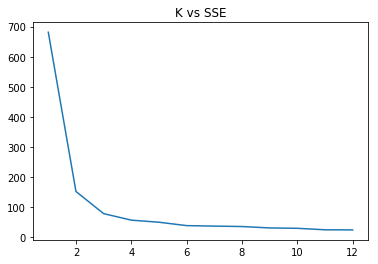

In [18]:
plt.plot(ks, sses.values())
plt.title('K vs SSE')
plt.show()